In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from tqdm import tqdm_notebook as tqdm
import matplotlib.cm as cm

In [2]:
import synapse_model as syn

In [3]:
def mismatch(T, g1, g2):
    return np.exp(-g1 * 1/T - g2)

In [4]:
def syn_model(T, kappa, g01, g11, g12, g21, g22):
    L0 = mismatch(T, g01, 0)
    L1 = mismatch(T, g11, g12)
    L2 = mismatch(T, g21, g22)
    return kappa*L0/(1 + L1 - L2)

# def syn_jac(T, kappa, g01, g11, g12, g21, g22):
#     ts = syn_model(T, kappa, g01, g11, g12, g21, g22)
#     L0 = mismatch(T, g01, 0)
#     L1 = mismatch(T, g11, g12)
#     L2 = mismatch(T, g21, g22)
    
#     dkappa = ts/kappa
#     dg01 = -ts/T
#     dL1 = -ts/(1 + L0 - L2)
#     dg11 = -L1/T * dL1
#     dg12 = -L1 * dL1
#     dL2 = -dL1
#     dg21 = -L2/T * dL2
#     dg22 = -L2 * dL2
    
#     gradient = (dkappa, dg01, dg11, dg12, dg21, dg22)
#     gradient = np.array(gradient).T
#     return gradient

In [ ]:
N_Trials = 1000
resids = []
paramss = []
fits = []
T = np.linspace(300, 400, 100)
for _ in tqdm(range(N_Trials)):
    kappa = np.random.randn() + 3
    g01, g11 = np.random.randn(2)*8
    g21 = np.random.randn()*3
    g12, g22 = np.random.randn(2)
    params = (kappa, g01, g11, g12, g21, g22)

    response = syn_model(T, *params)
    best_fit = []
    best_resid = np.infty
    failures = 0

    for i in range(20):
        try:
            fit, cov = curve_fit(syn_model, T, response, p0 = [1, *np.random.randn(5)])
        except RuntimeError:
            pass
        else:
            resid = np.sum((response - syn_model(T, *fit))**2)/len(response)
            if(resid < best_resid):
                best_resid = resid
                best_fit = fit
    resids.append(best_resid)
    paramss.append(params)
    fits.append(best_fit)
resids = np.array(resids)
paramss = np.array(paramss)
fits = np.array(fits)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


In [29]:
scores = np.array([np.sum([np.abs(p[i] - f[i])/np.abs(f[i]) for i in range(6)]) for p, f in zip(paramss, fits)])

(1e-28, 1e-13)

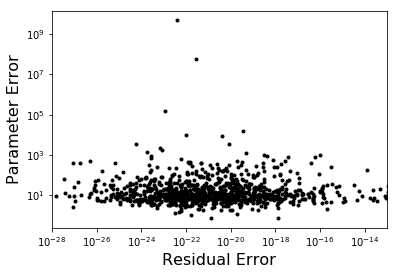

In [30]:
plt.plot(resids, scores, 'k.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Residual Error', fontsize = 16)
plt.ylabel('Parameter Error', fontsize = 16)
plt.xlim(1e-28, 1e-13)

In [31]:
error = np.array([[1 - f[i]/p[i] for i in range(6)] for p, f in zip(paramss, fits)])
error.shape

(1000, 6)

Text(0.5,0.98,'$\\tau(T) = \\kappa \\frac{\\Lambda(T; \\gamma_{01}, 0)}{1 + \\Lambda(T; \\gamma_{11}, \\gamma_{12})  - \\Lambda(T; \\gamma_{21}, \\gamma{22})  }$')

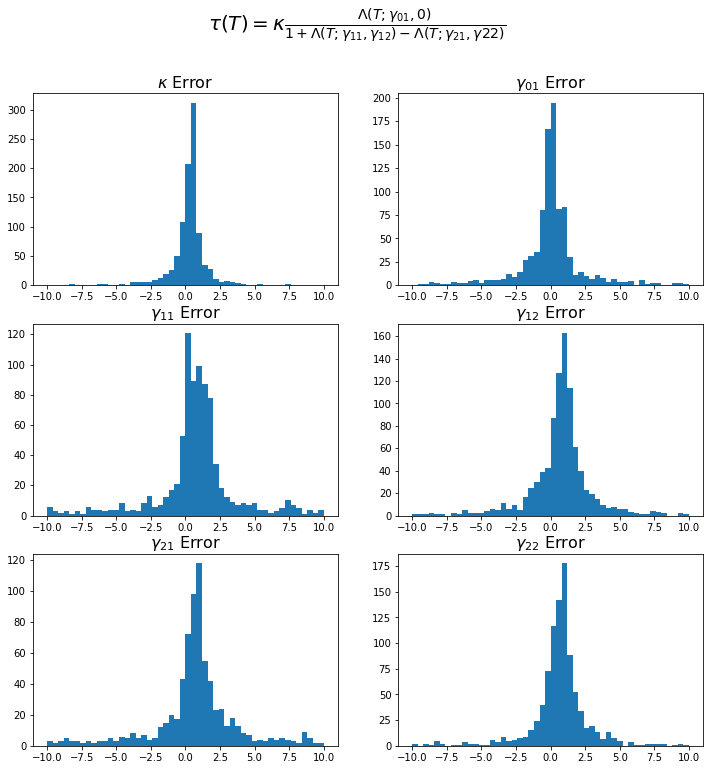

In [32]:
parameter_order = [r'$\kappa$', r'$\gamma_{01}$', r'$\gamma_{11}$', r'$\gamma_{12}$', r'$\gamma_{21}$',
                  r'$\gamma_{22}$']
fig, ax = plt.subplots(3,2, figsize = (12,12))
ax = ax.flatten()
for i in range(6):
    ax[i].hist(error[:, i], bins = 50, range = [-10, 10])
    ax[i].set_title(parameter_order[i] + ' Error', fontsize = 16)
plt.suptitle(r'$\tau(T) = \kappa \frac{\Lambda(T; \gamma_{01}, 0)}{1 +' 
             + ' \Lambda(T; \gamma_{11}, \gamma_{12})  - \Lambda(T; \gamma_{21}, \gamma{22})  }$', fontsize = 20)

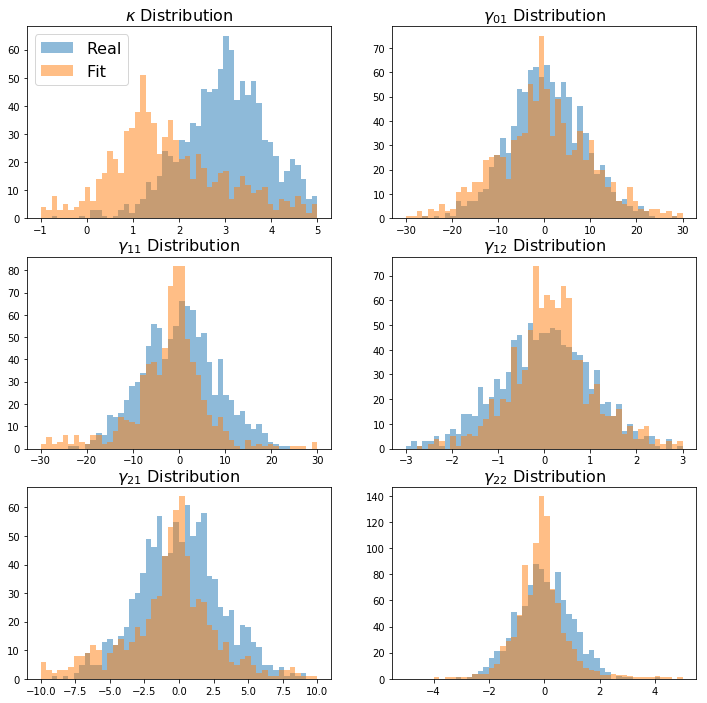

In [35]:
# Plotting Distributions:
parameter_order = [r'$\kappa$', r'$\gamma_{01}$', r'$\gamma_{11}$', r'$\gamma_{12}$', r'$\gamma_{21}$',
                  r'$\gamma_{22}$']
ranges = [ [-1, 5], [-30, 30], [-30, 30], [-3, 3], [-10, 10], [-5, 5]]
fig, ax = plt.subplots(3,2, figsize = (12,12))
ax = ax.flatten()
for i in range(6):
    ax[i].hist(paramss[:, i], bins = 50, range = ranges[i], alpha = 0.5, label = 'Real')
    ax[i].hist(fits[:, i], bins = 50, range = ranges[i], alpha = 0.5, label = 'Fit')
    ax[i].set_title(parameter_order[i] + ' Distribution', fontsize = 16)
ax[0].legend(fontsize = 16)

In [5]:
import synapse_model as syn

In [6]:
def first_order_model(t, tau):
    return 1 - np.exp(-t/tau)

def thermal_fo_step(x, kappa, g01, g11, g12, g21, g22):
    t, T = x
    tau = syn_model(T, kappa, g01, g11, g12, g21, g22)
    response = first_order_model(t, tau)
    return response

In [8]:
def draw_params():
    kappa = 1
    g01 = np.random.randn()*200
    g11 = np.random.randn()*200
    g12 = np.random.randn()*3 - 3
    g21 = np.random.randn()*200
    g22 = np.random.randn()*3 + 3
    return kappa, g01, g11, g12, g21, g22

In [9]:
N_T = 10
T = np.linspace(300, 350, N_T)
N = 1000

params = draw_params()
t = np.linspace(0, 2, N)
t = np.array(list(t)*N_T)
T = np.array([[T[i]]*N for i in range(N_T)]).flatten()

step = thermal_fo_step((t, T), *params)

In [10]:
N_T = 10
T = np.linspace(300, 350, N_T)
N = 1000

params = draw_params()
t = np.linspace(0, 2, N)
t = np.array(list(t)*N_T)
T = np.array([[T[i]]*N for i in range(N_T)]).flatten()

step = thermal_fo_step((t, T), *params) + np.random.randn(N*N_T)*0.01

best_fit = []
best_resid = np.infty
for _ in tqdm(range(20)):
    try:
        fit, cov = curve_fit(thermal_fo_step, (t,T), step, p0 = draw_params())
    except RuntimeError:
        pass
    else:
        model = thermal_fo_step((t, T), *fit)
        res = np.linalg.norm(model - step)
        if (res < best_resid):
            best_resid = res
            best_fit = fit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [11]:
Ts = np.linspace(300, 400, 100)
tau_real = syn_model(Ts, *params)
tau_model = syn_model(Ts, *fit)

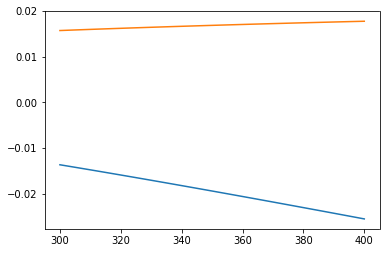

In [12]:
plt.plot(Ts, tau_real)
plt.plot(Ts, tau_model)

In [13]:
model = thermal_fo_step((t, T), *best_fit)

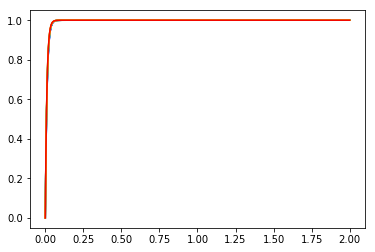

In [14]:
tt = t.reshape(N_T, N)
modelt = model.reshape(N_T, N)
for i in range(N_T):
    plt.plot(tt[i], modelt[i], c = cm.jet(i/N_T))

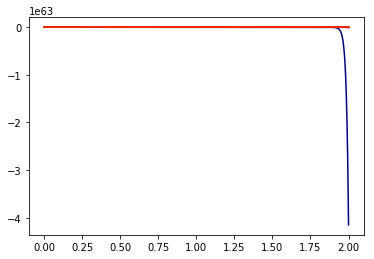

In [15]:
tt = t.reshape(N_T, N)
stept = step.reshape(N_T, N)
for i in range(N_T):
    plt.plot(tt[i], stept[i], c = cm.jet(i/N_T))

In [326]:
print(fit - params)

[ -6.90530681e-01   1.23898747e+02   1.78980825e+05  -3.69775665e+02
   7.08014799e+02   1.87777558e+00]


# Too Many Parameters: Subspace of the Parameter Space Yields same behavior...

In [16]:
def simpler_syn(T, kappa, g01, g02, g11, g12):
    return kappa /(1 + mismatch(T, g01, g02) - mismatch(T, g11, g12))

def simpler_fo_step(x, kappa, g01, g02, g11, g12):
    t, T = x
    tau = simpler_syn(T, kappa, g01, g02, g11, g12)
    response = first_order_model(t, tau)
    return response

In [17]:
def draw_simpler_params():
    kappa = 1
    g01 = np.random.randn()*200
    g02 = np.random.randn()*3 - 3
    g11 = np.random.randn()*200
    g12 = np.random.randn()*3 + 3
    return kappa, g01, g02, g11, g12

In [18]:
def simple_thermal_step_fit(t, T, step, N_trial = 10):
    best_fit = []
    best_resid = np.infty
    for _ in tqdm(range(N_trail)):
        try:
            fit, cov = curve_fit(simpler_fo_step, (t,T), step, p0 = draw_simpler_params())
        except RuntimeError:
            pass
        else:
            model = simpler_fo_step((t, T), *fit)
            res = np.linalg.norm(model - step)
            if (res < best_resid):
                best_resid = res
                best_fit = fit
    return best_fit

In [19]:
def single_temp_fits(t, step_set):
    taus = []
    for i in range(len(step_set)):
        fit, cov = curve_fit(first_order_model, t, step_set[i], p0 = 1)
        taus.append(fit)
    return np.array(taus)

In [20]:
noise_level = 0.01

N_T = 40
Ta = np.linspace(300, 350, N_T)
N = 1000

tau = 0
while(tau < 0.01):
    params = draw_params()
    tau = syn_model(300, *params)

t = np.linspace(0, 2, N)
tset = np.array(list(t)*N_T)
T = np.array([[Ta[i]]*N for i in range(N_T)]).flatten()

step = thermal_fo_step((tset, T), *params) + np.random.randn(N*N_T)*noise_level

best_simple = simple_thermal_step_fit(tset, T, step, N_trial = 10)
best_single = single_temp_fits(t, step.reshape(N_T, N))

NameError: name 'N_trail' is not defined

Text(0.5,1,'Fit At Each Temperature')

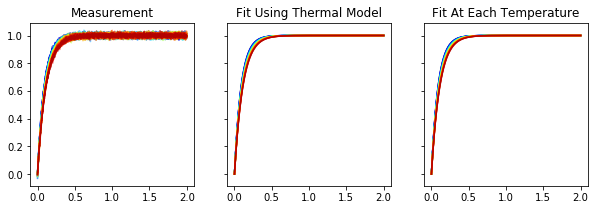

In [455]:
model = simpler_fo_step((tset, T), *best_simple)
modelt = model.reshape(N_T, N)
stept = step.reshape(N_T, N)
fig, ax = plt.subplots(1,3, figsize = (10,3), sharey = True)
for i in range(N_T):
    ax[1].plot(t, modelt[i], c = cm.jet(i/N_T), alpha = 0.5)
    ax[0].plot(t, stept[i], c = cm.jet(i/N_T), alpha = 0.5)
    ax[2].plot(t, first_order_model(t, best_single[i]), c = cm.jet(i/N_T), alpha = 0.5)
ax[0].set_title('Measurement')
ax[1].set_title('Fit Using Thermal Model')
ax[2].set_title('Fit At Each Temperature')

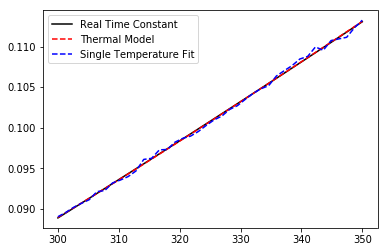

In [456]:
Tarr = np.linspace(300, 350, 100)
tau_real = syn_model(Ta, *params)
tau_model = simpler_syn(Ta, *best_simple)
plt.plot(Ta, tau_real, 'k', label = 'Real Time Constant')
plt.plot(Ta, tau_model, 'r--', label = 'Thermal Model')
plt.plot(Ta, best_single, 'b--', label = 'Single Temperature Fit')
plt.legend()

# Effect of Noise Level

In [473]:
def one_trial(noise_level, params = None):
    N_T = 40
    Ta = np.linspace(300, 350, N_T)
    N = 1000
    
    if(params is None):
        tau = 0
        while(tau < 0.01):
            params = draw_params()
            tau = syn_model(300, *params)

    t = np.linspace(0, 2, N)
    tset = np.array(list(t)*N_T)
    T = np.array([[Ta[i]]*N for i in range(N_T)]).flatten()

    step = thermal_fo_step((tset, T), *params) + np.random.randn(N*N_T)*noise_level

    best_simple = simple_thermal_step_fit(tset, T, step, N_trial = 8)
    tau_single = single_temp_fits(t, step.reshape(N_T, N))
    
    tau_real = syn_model(Ta, *params)
    tau_simple = simpler_syn(Ta, *best_simple)
    
    return tau_real, tau_simple, tau_single, Ta

In [484]:
noise_levels = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]

tau = 0
while(tau < 0.01):
    params = draw_params()
    tau = syn_model(300, *params)

trials = []
for nl in noise_levels:
    trials.append(one_trial(nl, params = params))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


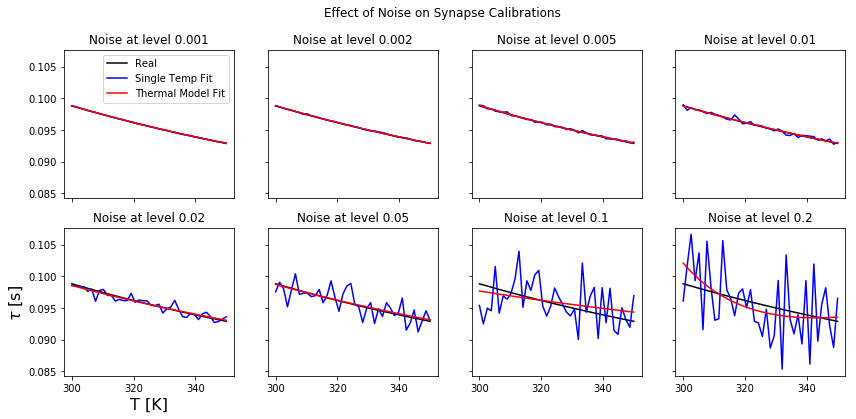

In [495]:
fig, ax = plt.subplots(2,4, figsize = (14,6), sharex = True, sharey = True)
ax = ax.flatten()
for i, nl in enumerate(noise_levels):
    tau_real, tau_simple, tau_single, Tarr = trials[i]
    ax[i].plot(Tarr, tau_real, 'k', label = 'Real')
    ax[i].plot(Tarr, tau_single, 'b', label = 'Single Temp Fit')
    ax[i].plot(Tarr, tau_simple, 'r', label = 'Thermal Model Fit')
    ax[i].set_title('Noise at level ' + str(nl))
ax[0].legend()
ax[4].set_xlabel('T [K]', fontsize = 16)
ax[4].set_ylabel(r'$\tau$ [s]', fontsize = 16)
plt.suptitle('Effect of Noise on Synapse Calibrations')
plt.savefig('Noisy_Calibration', dpi = 700)

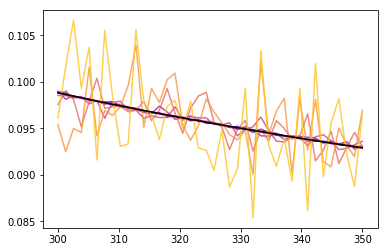

In [486]:
for i, trial in enumerate(trials):
    tau_real, tau_simple, tau_single, Tarr = trial
    plt.plot(Tarr, tau_single, c = cm.plasma(i/len(trials)), alpha = 0.8)
plt.plot(Tarr, tau_real, 'k')

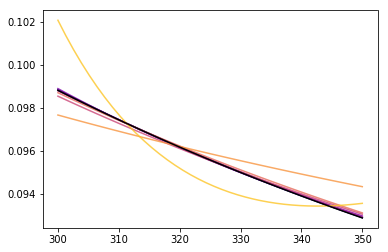

In [487]:
for i, trial in enumerate(trials):
    tau_real, tau_simple, tau_single, Tarr = trial
    plt.plot(Tarr, tau_simple, c = cm.plasma(i/len(trials)), alpha = 0.8)
plt.plot(Tarr, tau_real, 'k')

In [23]:
import synapse_model as syn
%load_ext autoreload

In [45]:
%autoreload

In [46]:
step, T, t = syn.draw_step(noise = 0.5)

In [47]:
best_fit = syn.simple_thermal_step_fit(step, T, t)

C:\Users\Scott Reid\Documents\Masters\Neuromorphics\Braindrop_Utilities\synapse_model.py:40: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-g1 * 1/T - g2)
C:\Users\Scott Reid\Documents\Masters\Neuromorphics\Braindrop_Utilities\synapse_model.py:40: RuntimeWarning: overflow encountered in exp
  return np.exp(-g1 * 1/T - g2)
C:\Users\Scott Reid\Documents\Masters\Neuromorphics\Braindrop_Utilities\synapse_model.py:58: RuntimeWarning: invalid value encountered in subtract
  return kappa /(1 + mismatch(T, g01, g02) - mismatch(T, g11, g12))
C:\Users\Scott Reid\Documents\Masters\Neuromorphics\Braindrop_Utilities\synapse_model.py:49: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.exp(-t/tau)
C:\Users\Scott Reid\Documents\Masters\Neuromorphics\Braindrop_Utilities\synapse_model.py:49: RuntimeWarning: overflow encountered in true_divide
  return 1 - np.exp(-t/tau)
C:\Users\Scott Reid\Documents\Masters\Neuromorphics\Braindrop_Utilities\synapse_m

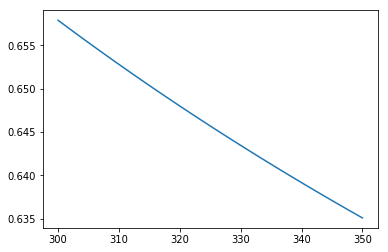

In [48]:
T = np.linspace(300, 350, 100)
plt.plot(T, syn.simpler_syn(T, *best_fit))